# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [6]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [7]:
# Lire le fichier CSV en sautant la première ligne
df = pd.read_csv("data/co2copy.csv", skiprows=1)

# Obtenir la valeur maximale
max_value = float(df.max().values)

# Obtenir la valeur minimale
min_value = float(df.min().values)

# Afficher les résultats
print("Valeur maximale :", max_value)
print("Valeur minimale :", min_value)

Valeur maximale : 383.58
Valeur minimale : 350.69


In [8]:
## Data loading
data_name = 'co2V'
seq_len = 50

if data_name in ['stock', 'energy', 'co2', 'co2V']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 130, 1
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')
ori_data = np.expand_dims(ori_data,2)

co2V dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [9]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 1000
parameters['batch_size'] = 64

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [10]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

Start Embedding Network Training
step: 0/1000, e_loss: 0.2397
step: 500/1000, e_loss: 0.0496


KeyboardInterrupt: 

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [ ]:
# metric_iteration = 5

# discriminative_score = list()
# for _ in range(metric_iteration):
#   temp_disc = discriminative_score_metrics(ori_data, generated_data)
#   discriminative_score.append(temp_disc)

# print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.


KeyboardInterrupt: 

## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [ ]:
# predictive_score = list()
# for tt in range(metric_iteration):
#   temp_pred = predictive_score_metrics(ori_data, generated_data)
#   predictive_score.append(temp_pred)   
    
# print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.1776


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

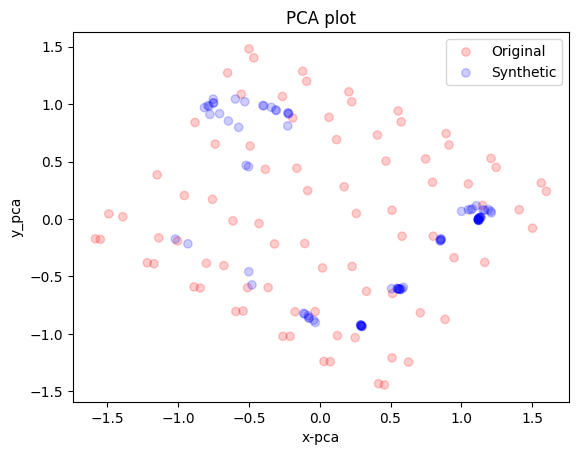

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 164 samples in 0.001s...
[t-SNE] Computed neighbors for 164 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 164 / 164
[t-SNE] Mean sigma: 0.823316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.224510
[t-SNE] KL divergence after 300 iterations: 0.427865


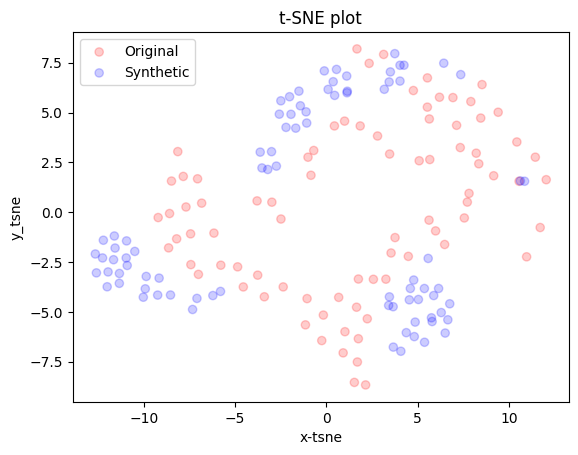

In [ ]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

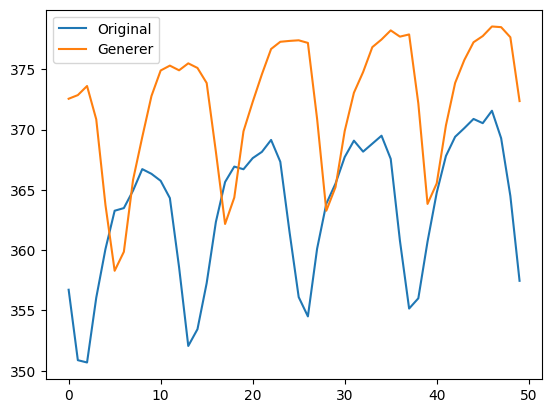

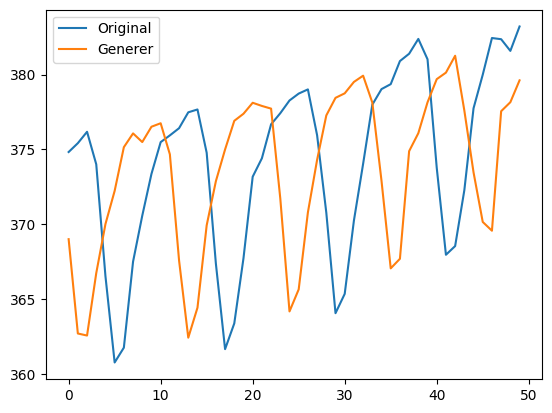

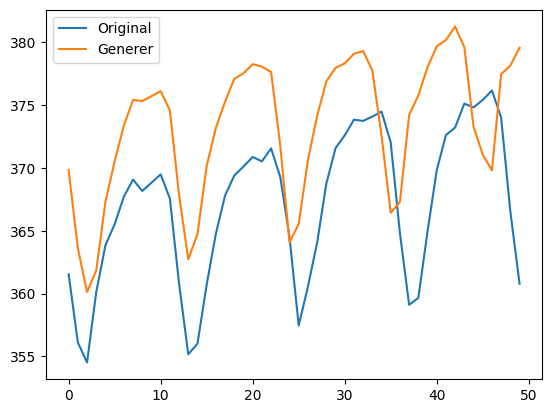

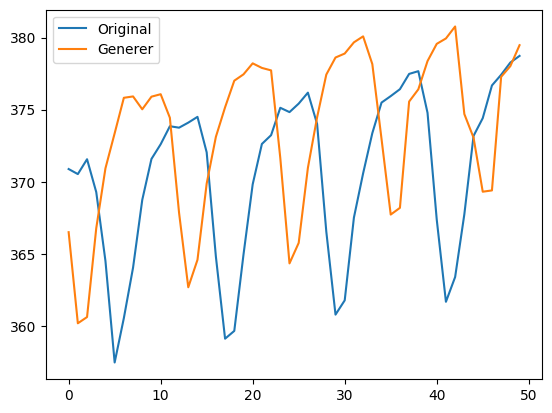

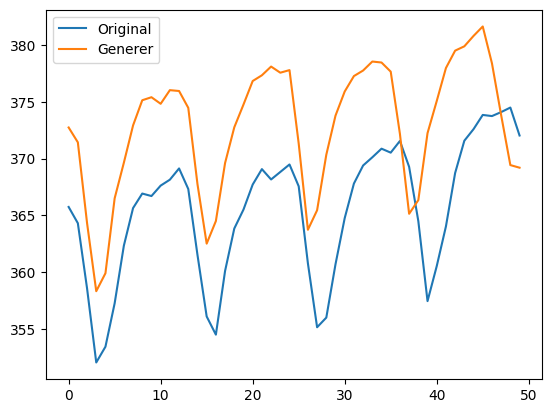

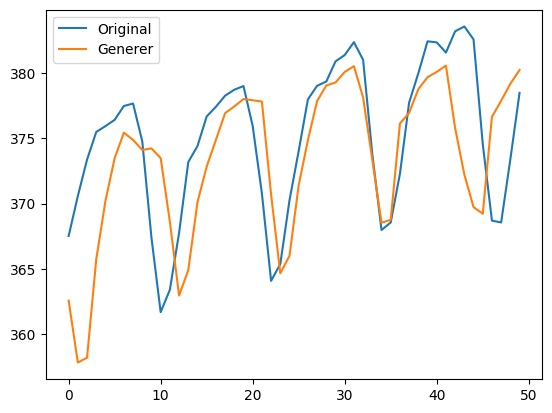

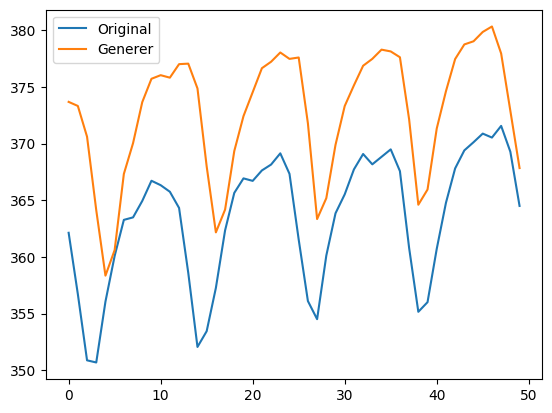

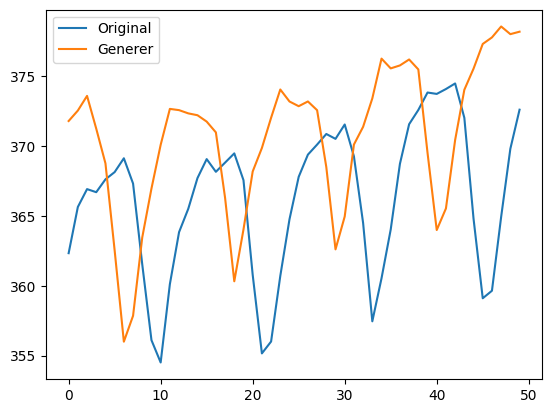

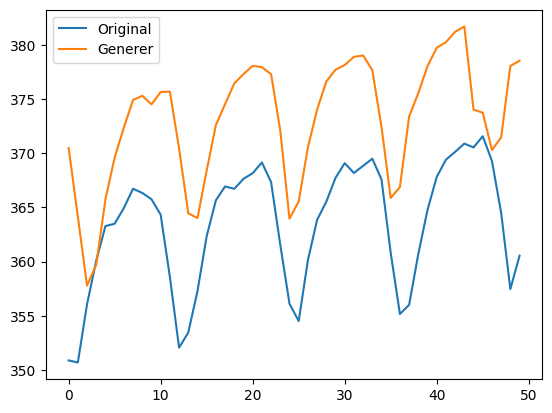

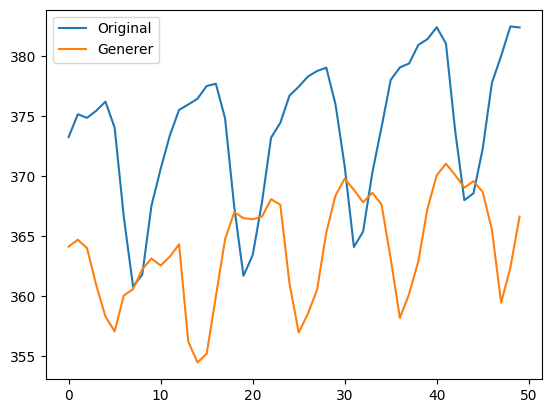

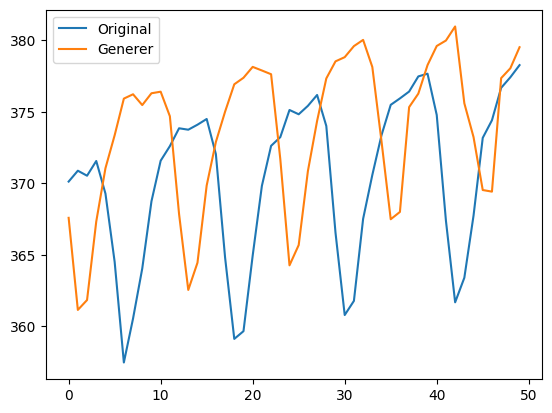

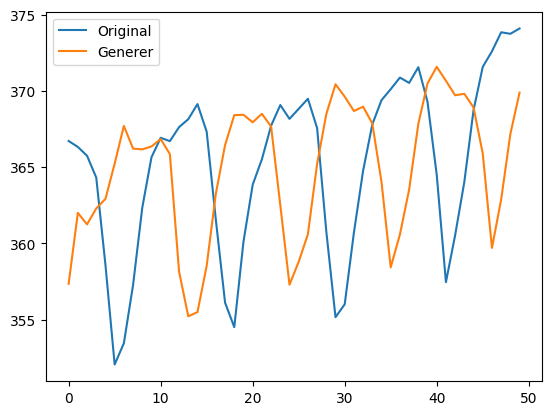

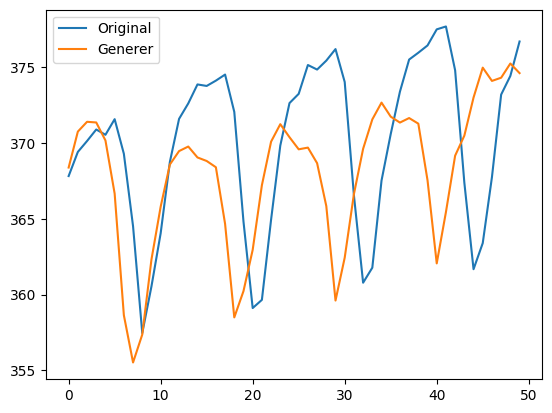

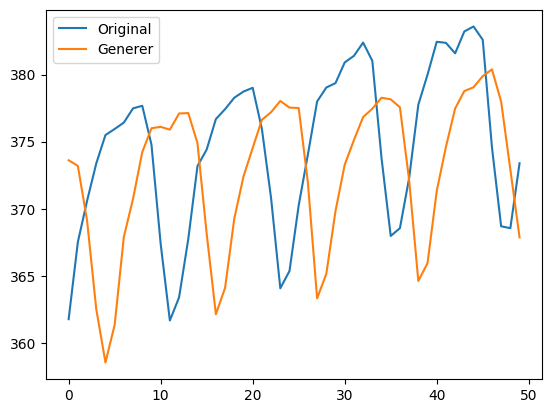

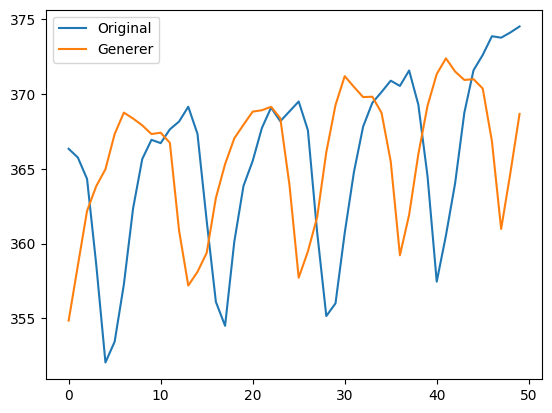

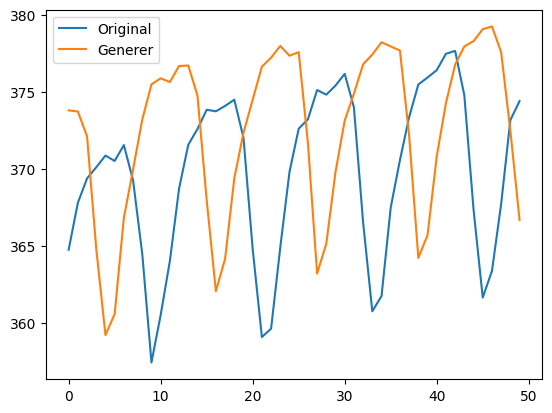

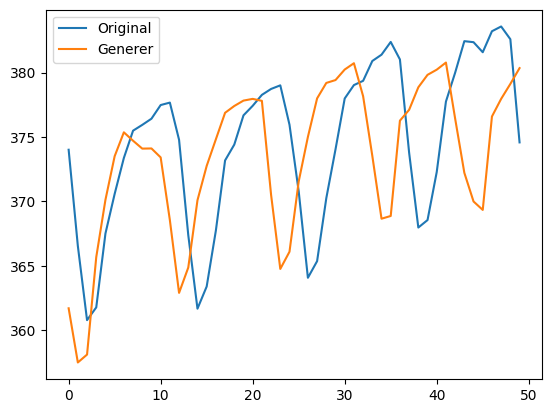

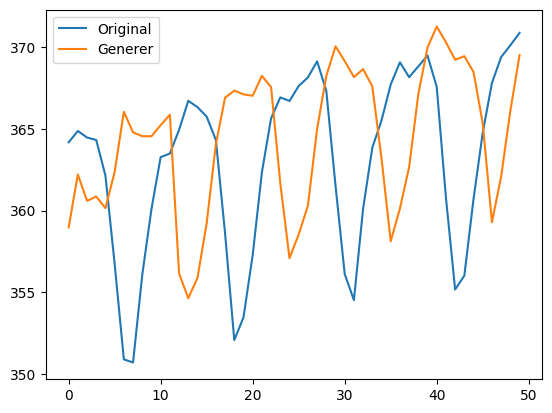

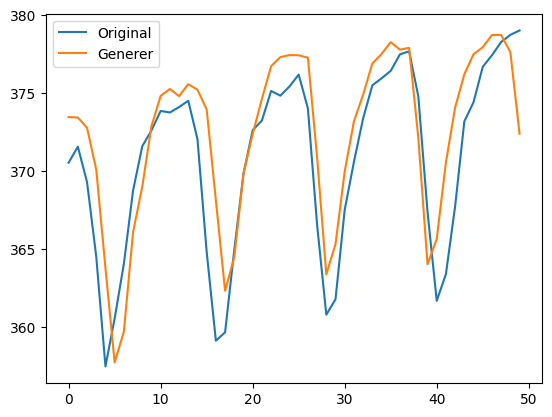

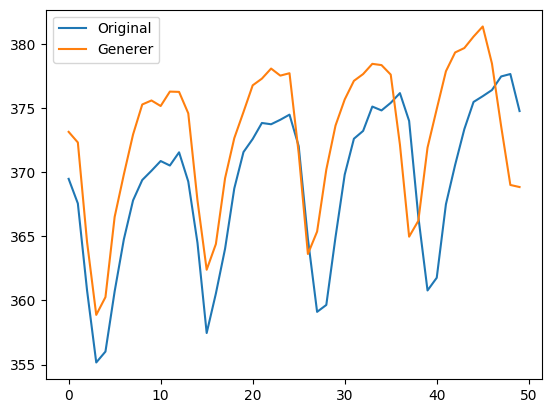

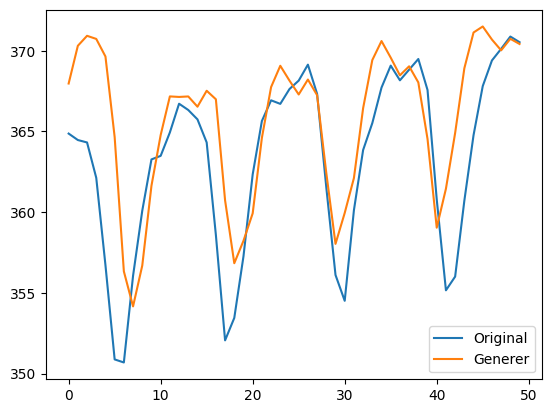

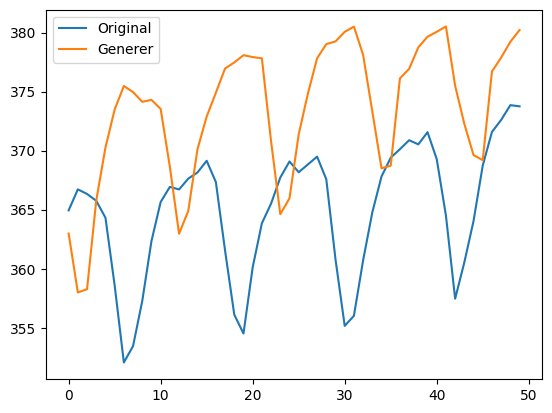

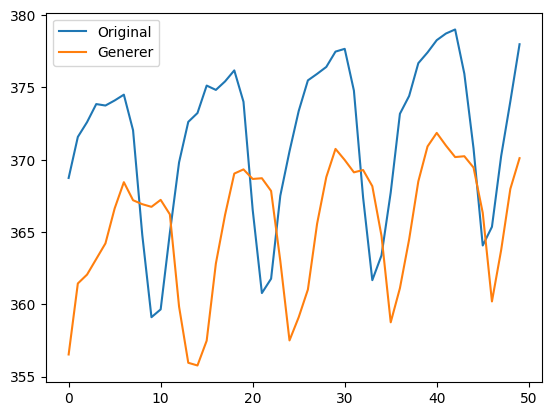

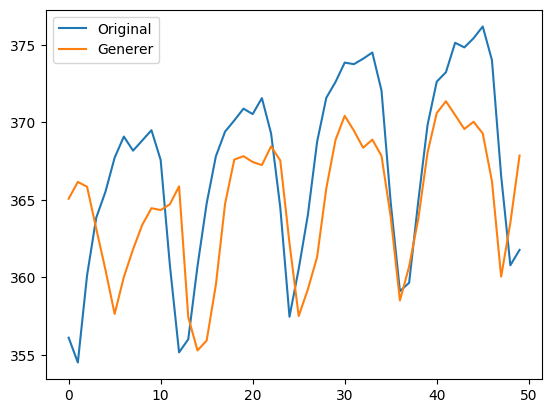

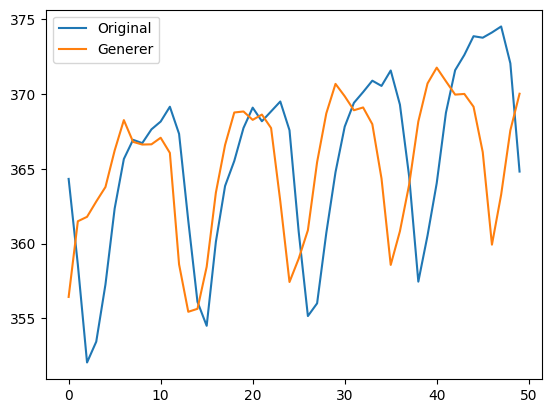

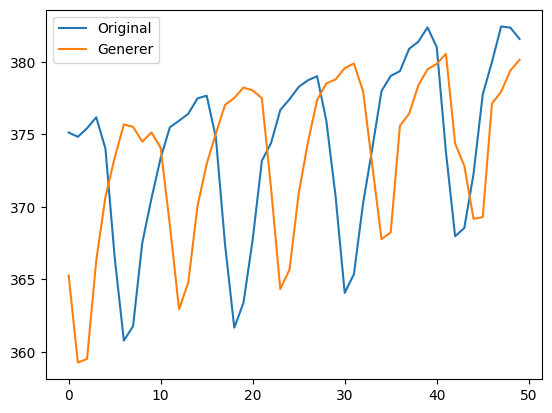

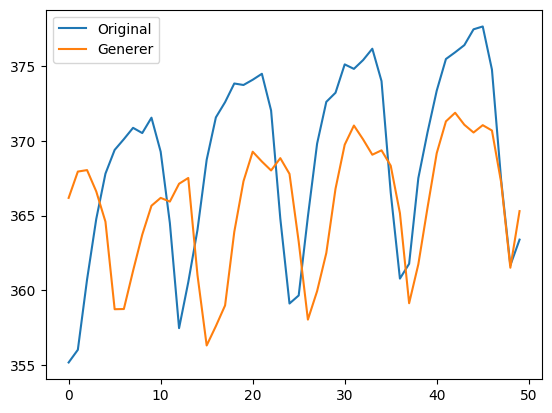

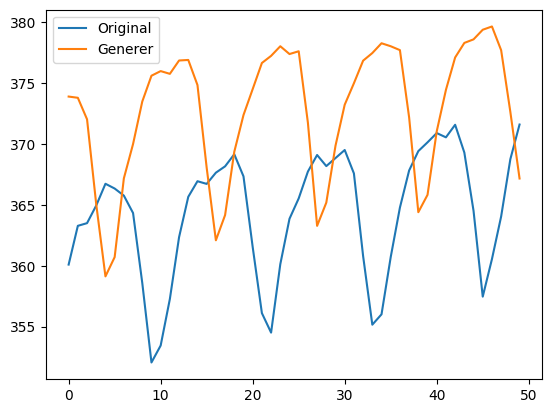

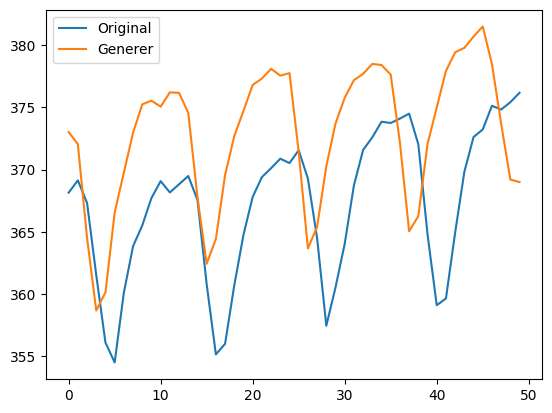

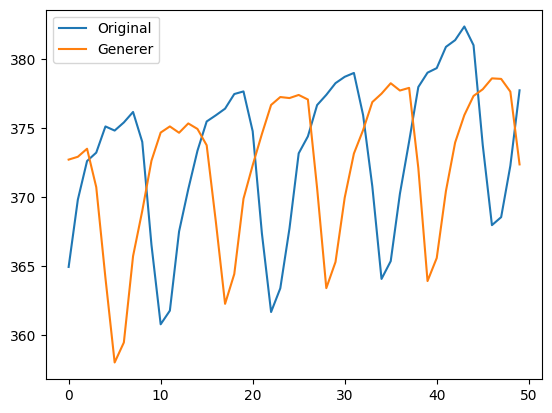

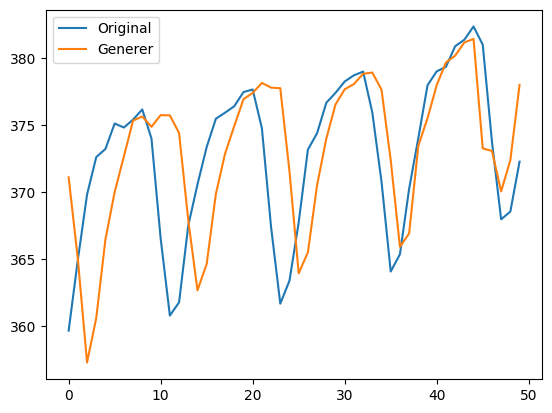

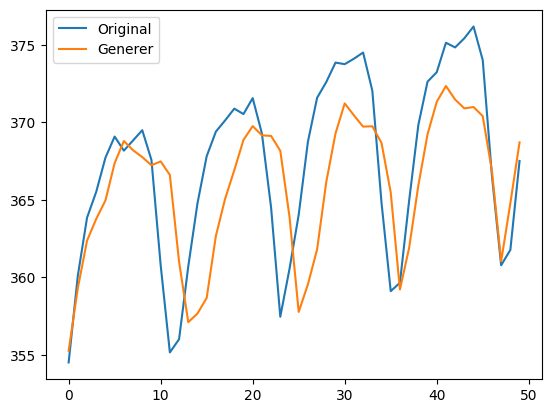

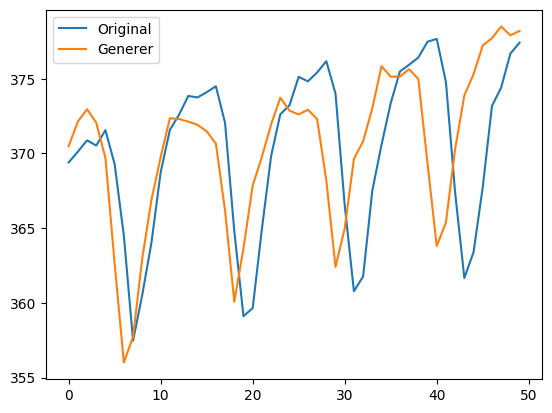

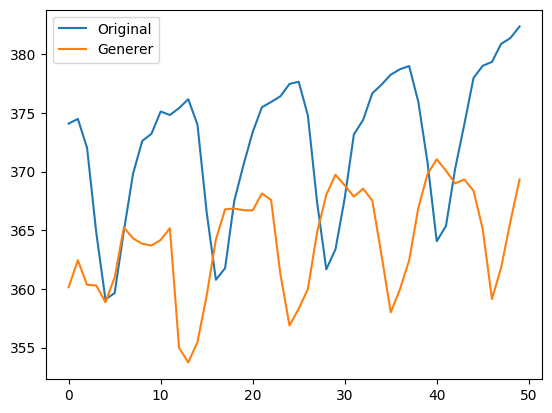

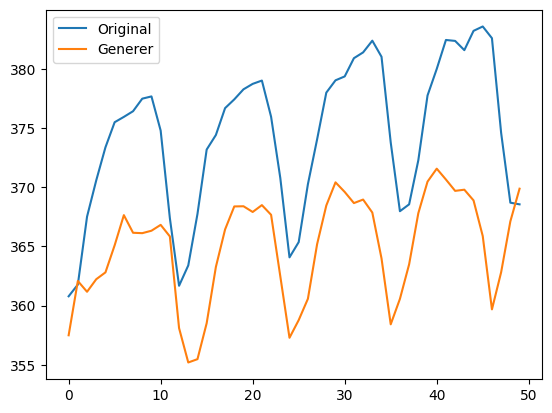

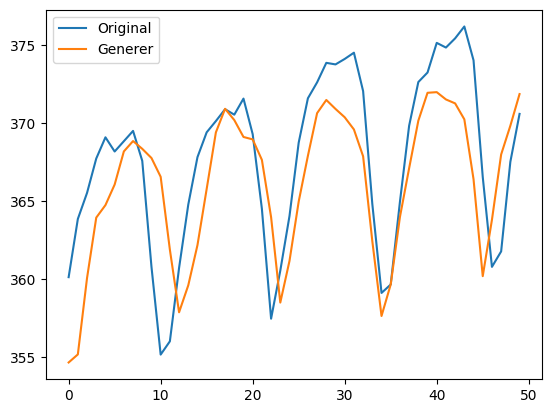

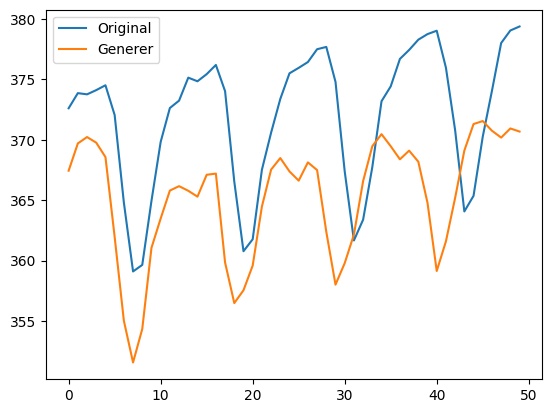

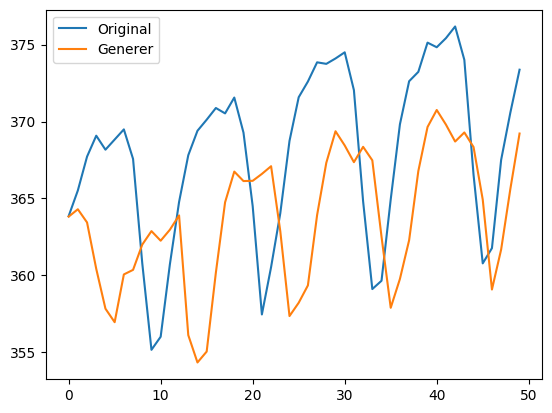

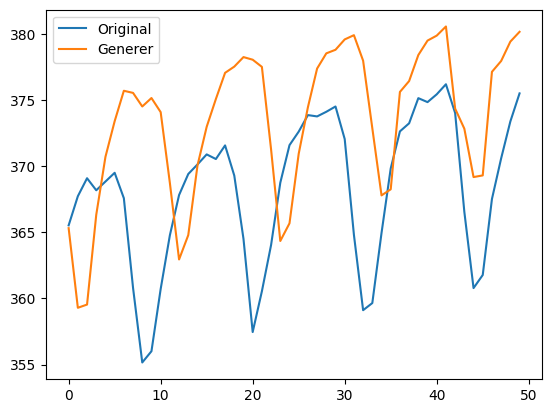

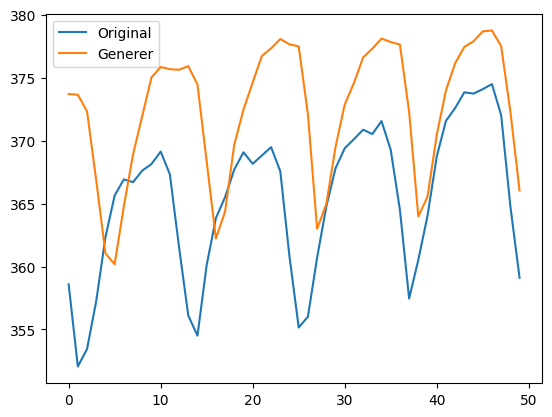

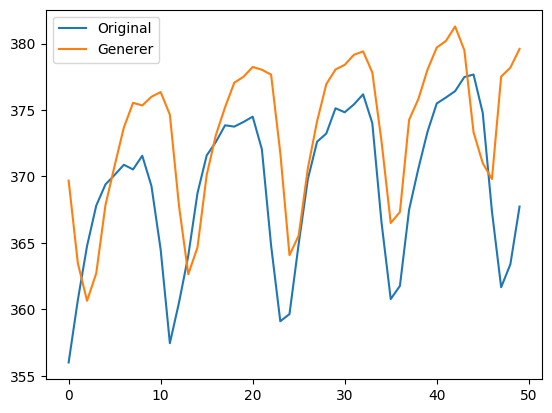

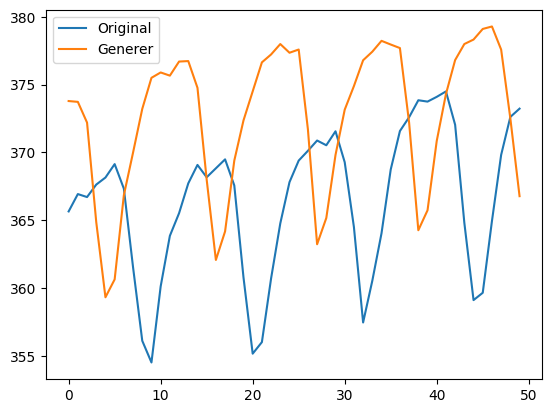

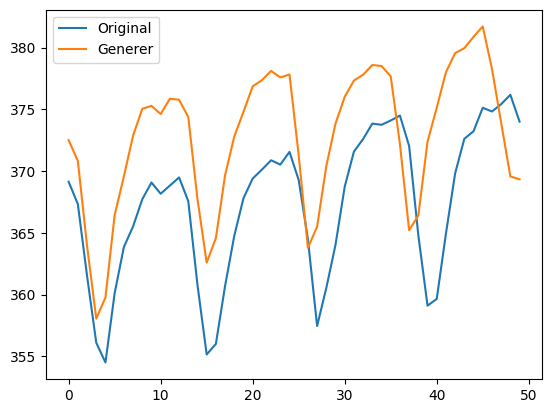

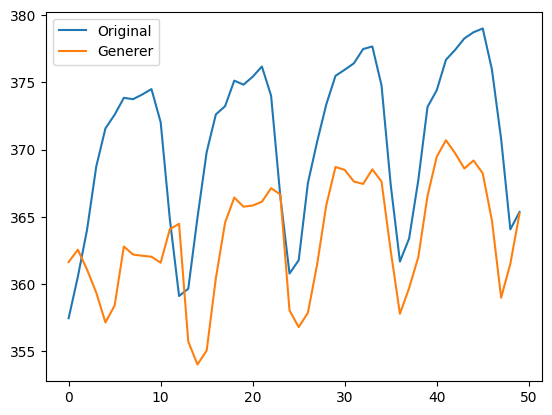

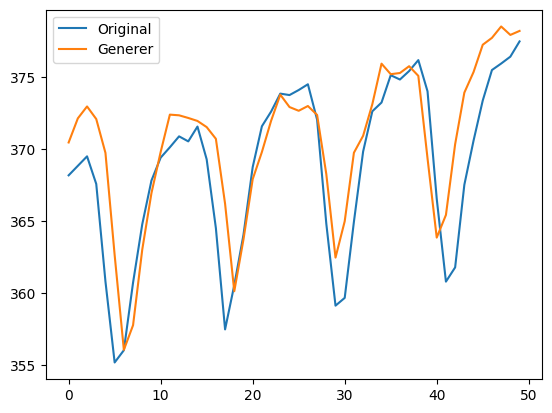

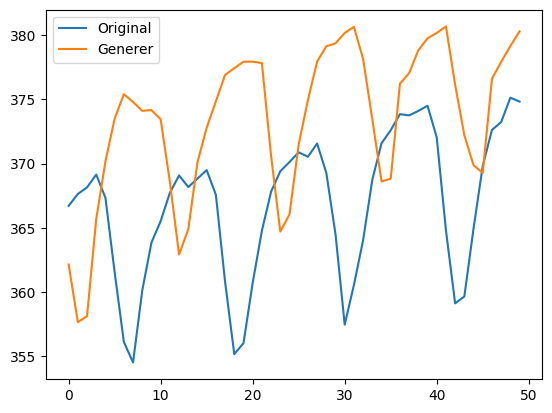

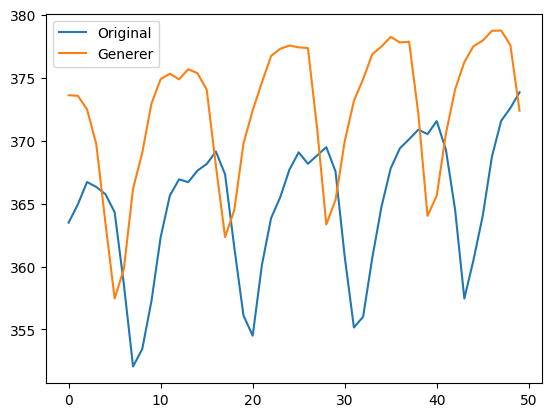

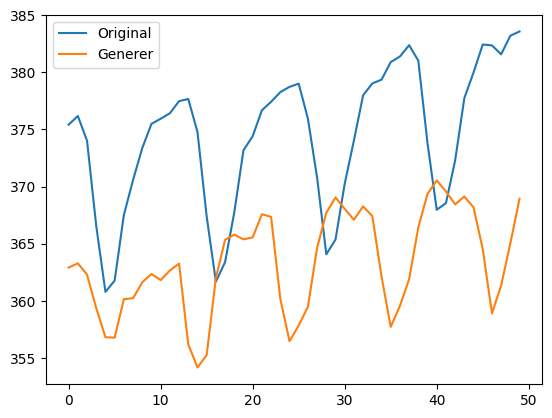

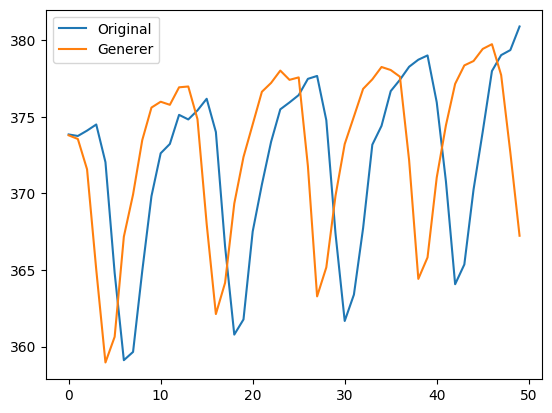

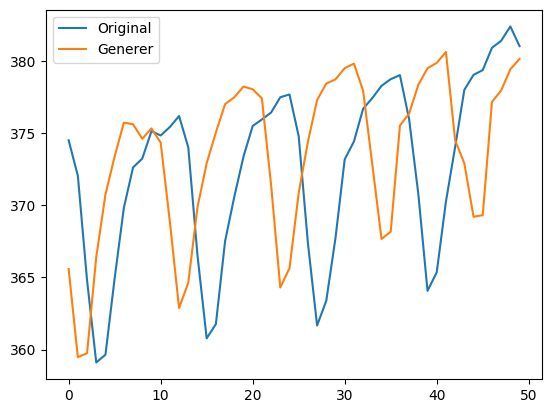

In [ ]:
import matplotlib.pyplot as plt

ori_data_deno = ori_data * (max_value - min_value) + min_value
generated_data_deno = generated_data * (max_value - min_value) + min_value

for i in range(generated_data.shape[1]):
    plt.figure()
    plt.plot(ori_data_deno[i], label='Original')
    plt.plot(generated_data_deno[i], label='Generer')
    plt.legend()
plt.show()